# Implement with R

Understand the various Factorial designs.

## The Battery Design Experiment

This experiment aims to give a sense of a **Two-Variable factorial design**.

Suppose an engineer is designing a battery for use in a device that will be subjected to some extreme variations in temperature, and the only design parameter that he can select is the `3`-options plate material for the battery. He has no control over the temperature at which that device will encounter, and from experience, he knows temperature will affect the effective battery life.

Because temperature can be controlled in the product development laboratory for testing purposes, he decides to test all `3` plate materials at `3` temp levels — `15`, `70`, and `125`°F, as these temperature levels are consistent with the product end-use environment. 

`4` batteries are tested at each combination of plate material and temperature.

In this problem, the engineer wants to answer the following questions:

1. What effects do type of material and temperature have on the life of the battery?
2. Is there a material that would give long life regardless of temperature?

Firstly, import the data

In [260]:
dataset <- read.csv("battery.csv")

Display the table to get a sense of the data

In [227]:
library(dplyr)

In [228]:
dataset %>% arrange(Material, Temp) %>% group_by(Material, Temp) %>% summarise(Lifes=paste0(Life, collapse=" , "), Total=sum(Life))

`summarise()` has grouped output by 'Material'. You can override using the `.groups` argument.



Material,Temp,Lifes,Total
<chr>,<int>,<chr>,<int>
M1,15,"130 , 74 , 155 , 180",539
M1,70,"34 , 80 , 40 , 75",229
M1,125,"20 , 82 , 70 , 58",230
M2,15,"150 , 159 , 188 , 126",623
M2,70,"136 , 106 , 122 , 115",479
M2,125,"25 , 58 , 70 , 45",198
M3,15,"138 , 168 , 110 , 160",576
M3,70,"174 , 150 , 120 , 139",583
M3,125,"96 , 82 , 104 , 60",342


In [229]:
t(dataset %>% group_by(Material) %>% summarise(Total=sum(Life)))

Material,M1,M2,M3
Total,998,1300,1501


In [230]:
t(dataset %>% group_by(Temp) %>% summarise(Total=sum(Life)))

Temp,15,70,125
Total,1738,1291,770


In [231]:
sum(dataset$Life)

[1] 3799

Using factorial design in ANOVA

$y \sim A + B + AB$

Since temperature and material are controllable factors,

In [261]:
dataset$Temp <- factor(dataset$Temp)
dataset$Material <- factor(dataset$Material)

Because there are `2` variables at `3` levels (for all factors), this can be considered as $3^2$ factorial design.

This gives the `9` interactions since there are `3` material types and `3` temperature levels.

Since there are `4` batteries it is run on, there will be `36` tests run in random order since $3 \times 3 \times 4 = 36$

In [265]:
anova <- aov(Life ~ Material * Temp, data=dataset)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
Material       2  10684    5342   7.911  0.00198 ** 
Temp           2  39119   19559  28.968 1.91e-07 ***
Material:Temp  4   9614    2403   3.560  0.01861 *  
Residuals     27  18231     675                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display the Residual Diagnostic Plots

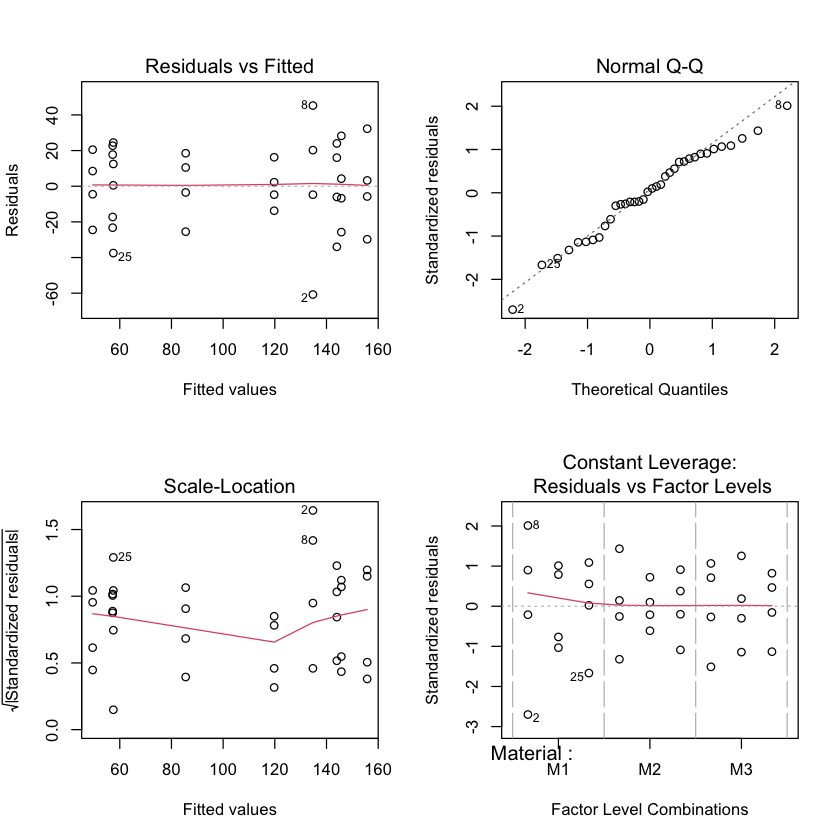

In [266]:
par(mfrow=c(2,2))
plot(anova)

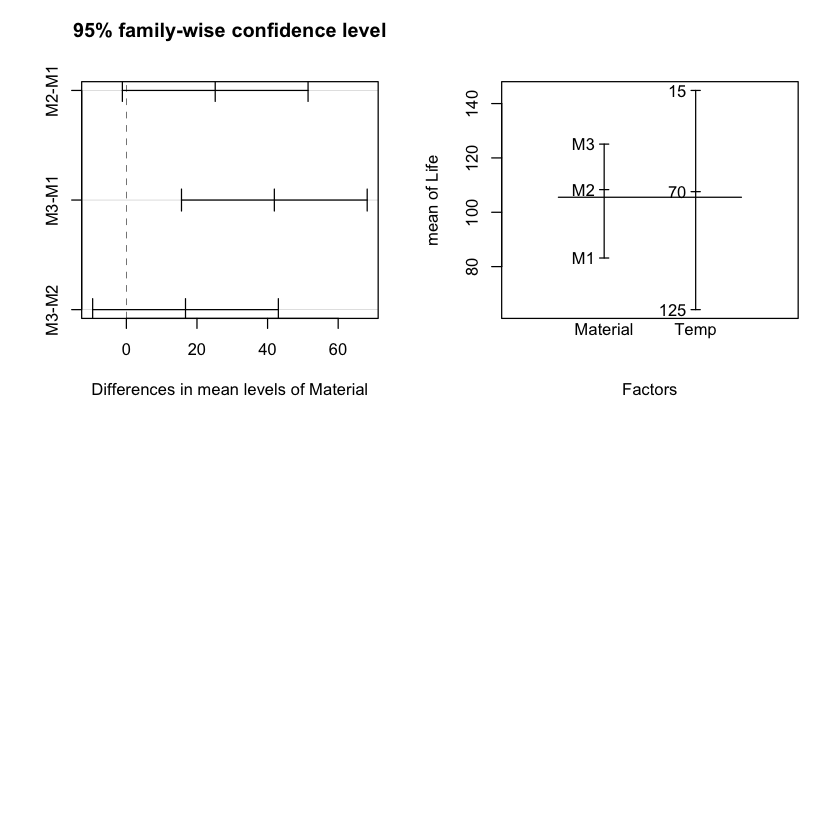

In [235]:
par(mfrow=c(2,2))
plot(TukeyHSD(anova, "Material"))
plot.design(Life ~ Material * Temp, data=dataset)

Warning message in title(...):
“conversion failure on 'Temperature (◦F)' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on 'Temperature (◦F)' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in title(...):
“conversion failure on 'Temperature (◦F)' in 'mbcsToSbcs': dot substituted for <a6>”


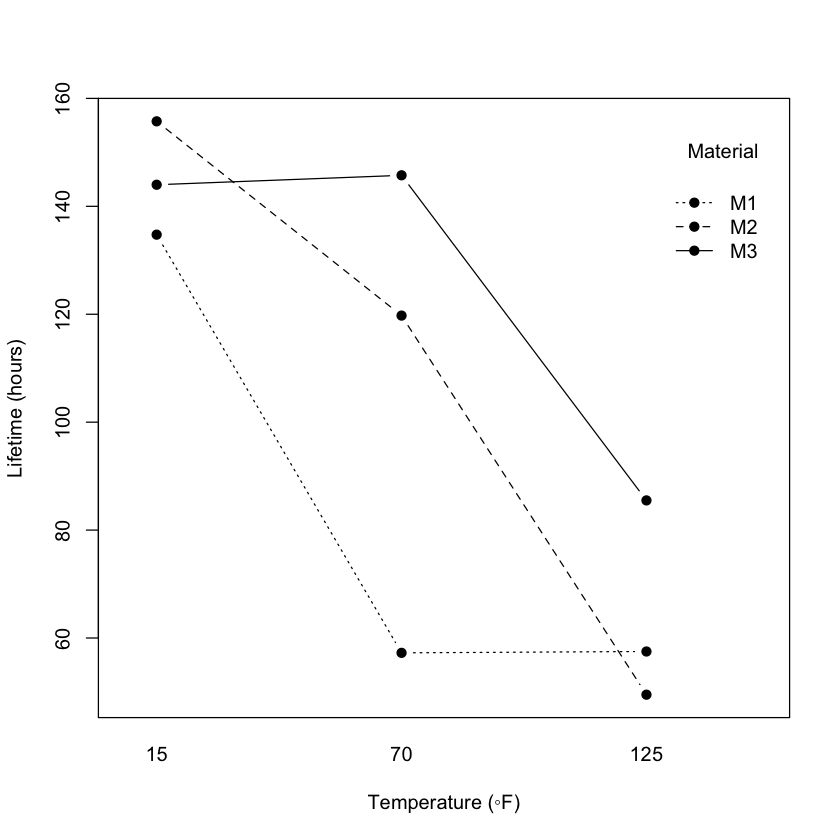

In [236]:
with(dataset, interaction.plot(Temp,Material,Life,type="b",pch=19, fixed=T, xlab="Temperature (◦F)",ylab="Lifetime (hours)"))


Display the averages,

In [15]:
dataset %>% arrange(Material, Temp) %>% group_by(Material, Temp) %>% summarise(Min=min(Life), Max=max(Life), Average=mean(Life))

`summarise()` has grouped output by 'Material'. You can override using the `.groups` argument.



Material,Temp,Min,Max,Average
<chr>,<fct>,<int>,<int>,<dbl>
M1,15,74,180,134.75
M1,70,34,80,57.25
M1,125,20,82,57.50
M2,15,126,188,155.75
M2,70,106,136,119.75
M2,125,25,70,49.50
M3,15,110,168,144.00
M3,70,120,174,145.75
M3,125,60,104,85.50


In [16]:
dataset %>% arrange(Material) %>% group_by(Material) %>% summarise(Min=min(Life), Max=max(Life), Average=mean(Life))

Material,Min,Max,Average
<chr>,<int>,<int>,<dbl>
M1,20,180,83.16667
M2,25,188,108.33333
M3,60,174,125.08333


Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. 
Conclusion: 

We reject the null hypothesis as all of two p-values are less than `0.05` (alpha level).

The is evidence of material types used and temperature applied significantly affecting battery lifetime.

There is evidence of significant interaction given the p-value less than `0.05` (alpha level). It is also indicated by the lack of parallelism of the lines. 

**What effects do type of material and temperature have on the life of the battery?**

As described above, there is a significant variation on the material types used and temperatures applied, that which is evidence that these variables affect the lifetime of the battery. In general, longer life is attained at low temperature regardless of material type. 

**Is there a material that would give long life regardless of temperature?**

From the averages, material `M3` would yield the best result. 

From the graph, when changing the temperature from `15`(◦F) to `70`(◦F), the battery's lifetime with `M3` may increase, but decreases for `M1` and `M2`. From `70`(◦F) to `125`(◦F) temperature, the battery's life decreases for material `M2` and `M3` and is deemed unchanged for `M1`. The drop in lifetime for `M3` is not as steep as compared to `M2` and `M1`.

In conclusion, `M3` seems to give the best results if we want less loss of battery life as the temperature changes.

## The Battery Design Experiment (Extended)

This experiment aims to give a sense of a **Fitting Response Curves via Linear Regression**.

We have two factors - the temperature (quantitative) and material type (qualitative), and each levels are `3`.

We can compute a linear and a quadratic effect to study how temperature affects the battery life.

We can set temperature with the quadractic and linear terms since it is quantitative to study both the linear and quadratic effects of the temperature.

Question: Why do we need to study the quadractic effects and what use does it have?

Re-import the dataset,

_Note that this dataset has been seen before so we need not display the tables_

In [294]:
dataset <- read.csv('battery.csv')

Set material type as the factor,

Question:
1. Why do we need to relevel and what does it do?
2. Why is Material the factor instead of Temperature here?

In [296]:
dataset$Material <- factor(dataset$Material)
dataset$Material <- relevel(dataset$Material, ref='M1')

Using factorial design ANOVA,

$y \sim A + B + B^2 + AB + AB^2$

In [298]:
anova <- aov(Life ~ Material * Temp + Material * I(Temp^2), data=dataset) 
summary(anova)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
Material            2  10684    5342   7.911  0.00198 ** 
Temp                1  39043   39043  57.823 3.53e-08 ***
I(Temp^2)           1     76      76   0.113  0.73975    
Material:Temp       2   2315    1158   1.714  0.19911    
Material:I(Temp^2)  2   7299    3649   5.405  0.01061 *  
Residuals          27  18231     675                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Constrants are how R handles categorial data (imagine one-hot encoding) ([read here for more](https://www.dummies.com/programming/r/how-to-set-the-contrasts-for-your-data-with-r/)),

Question: Does constrants have a similar methodology as one-hot encoding?

In [271]:
contrasts(dataset$Material)

,M2,M3
M1,0,0
M2,1,0
M3,0,1


Display Diagnostic Residuals Plots,

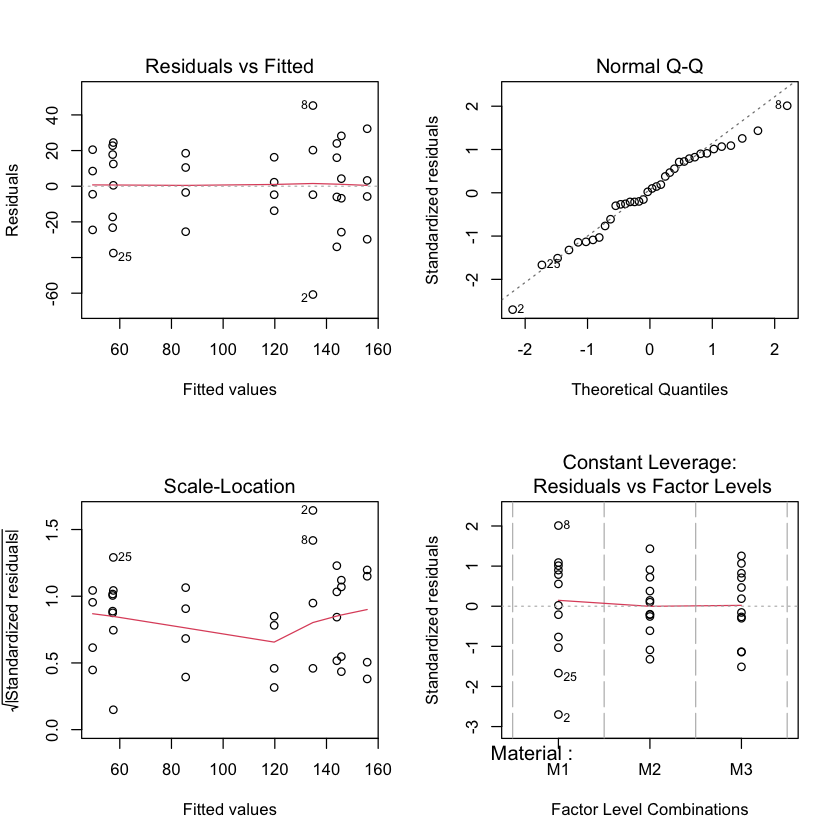

In [189]:
par(mfrow=c(2,2))  # 4 plots in one chart
plot(anova)

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. 
Conclusion: 

Similar to before, we reject the null hypothesis as two of the p-values are less than `0.05` (alpha level) for material types and temperature, finding that it significantly affects battery lifetime. We also find no significant interaction given the p-value less than `0.05` (alpha level).

However, the quadratic terms indicate a insignificant interaction as the p-value is more than `0.05` (alpha level).

## The Soft Drink Bottling Experiment

This experiment aims to give a sense of a **General factorial design model**.

Suppose a soft drink bottler is interested to obtain more uniform fill heights in the bottles produced by his manufacturing process. The filling machine should fill each bottle to the correct target amount, but in reality, there is variation around this target, and the bottler would like to understand the sources of this variability better and eventually reduce it. 

The process engineer can control `3` variables during the filling process: 

- **A**: The percent carbonation - `3` levels: `10`, `12`, and `14`%.
- **B**: The operating pressure in the filler - `2` levels (`25` and `30`psi).
- **C**: The bottles produced per minute (aka the line speed) - `2` levels (`200` and `250`bpm).

Pressure and speed are relatively easy to control, but the percent carbonation is more difficult to control during actual manufacturing because it varies with product temperature. However, for purposes of testing, the engineer can control carbonation at `3` levels.

He chooses `2` levels for pressure and `2` levels for line speed, and decides to run `2` replicates of a factorial design in these `3` variables, with all `24` runs in random order. 

The response variable observed is the average deviation from the target fill height observed in a production run of bottles at each set of conditions.

Positive deviations are fill heights above the target, whereas negative deviations are fill heights below the target.

Firstly, import the data

In [146]:
dataset <- read.csv("softdrink.csv")

Display the table to get a sense of the data

In [18]:
dataset %>% arrange(A, B, C) %>% group_by(A, B, C) %>% summarise(Deviations=paste0(Deviation, collapse=" , "), Total=sum(Deviation))

`summarise()` has grouped output by 'A', 'B'. You can override using the `.groups` argument.



A,B,C,Deviations,Total
<int>,<int>,<int>,<chr>,<int>
10,25,200,"-3 , -1",-4
10,25,250,"-1 , 0",-1
10,30,200,"-1 , 0",-1
10,30,250,"1 , 1",2
12,25,200,"0 , 1",1
12,25,250,"2 , 1",3
12,30,200,"2 , 3",5
12,30,250,"6 , 5",11
14,25,200,"5 , 4",9


In [19]:
t(dataset %>% group_by(A) %>% summarise(Total=sum(Deviation)))

A,10,12,14
Total,-4,20,59


In [20]:
t(dataset %>% group_by(B) %>% summarise(Total=sum(Deviation)))

B,25,30
Total,21,54


In [21]:
t(dataset %>% group_by(C) %>% summarise(Total=sum(Deviation)))

C,200,250
Total,26,49


In [22]:
sum(dataset$Deviation)

[1] 75

Print the interactions totals

In [23]:
t(dataset %>% arrange(B, C) %>% group_by(B, C) %>% summarise(Total=sum(Deviation)))

`summarise()` has grouped output by 'B'. You can override using the `.groups` argument.



B,25,25,30,30
C,200,250,200,250
Total,6,15,20,34


In [24]:
t(dataset %>% arrange(A, B) %>% group_by(A, B) %>% summarise(Total=sum(Deviation)))

`summarise()` has grouped output by 'A'. You can override using the `.groups` argument.



A,10,10,12,12,14,14
B,25,30,25,30,25,30
Total,-5,1,4,16,22,37


In [25]:
t(dataset %>% arrange(A, C) %>% group_by(A, C) %>% summarise(Total=sum(Deviation)))

`summarise()` has grouped output by 'A'. You can override using the `.groups` argument.



A,10,10,12,12,14,14
C,200,250,200,250,200,250
Total,-5,1,6,14,25,34


Using factorial design in ANOVA

Set these controllable factors,

In [147]:
dataset$A <- factor(dataset$A)
dataset$B <- factor(dataset$B)
dataset$C <- factor(dataset$C)

In [148]:
anova <- aov(Deviation ~ A * B * C, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            2 252.75  126.37 178.412 1.19e-09 ***
B            1  45.38   45.38  64.059 3.74e-06 ***
C            1  22.04   22.04  31.118  0.00012 ***
A:B          2   5.25    2.62   3.706  0.05581 .  
A:C          2   0.58    0.29   0.412  0.67149    
B:C          1   1.04    1.04   1.471  0.24859    
A:B:C        2   1.08    0.54   0.765  0.48687    
Residuals   12   8.50    0.71                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display the Residual Diagnostic Plots

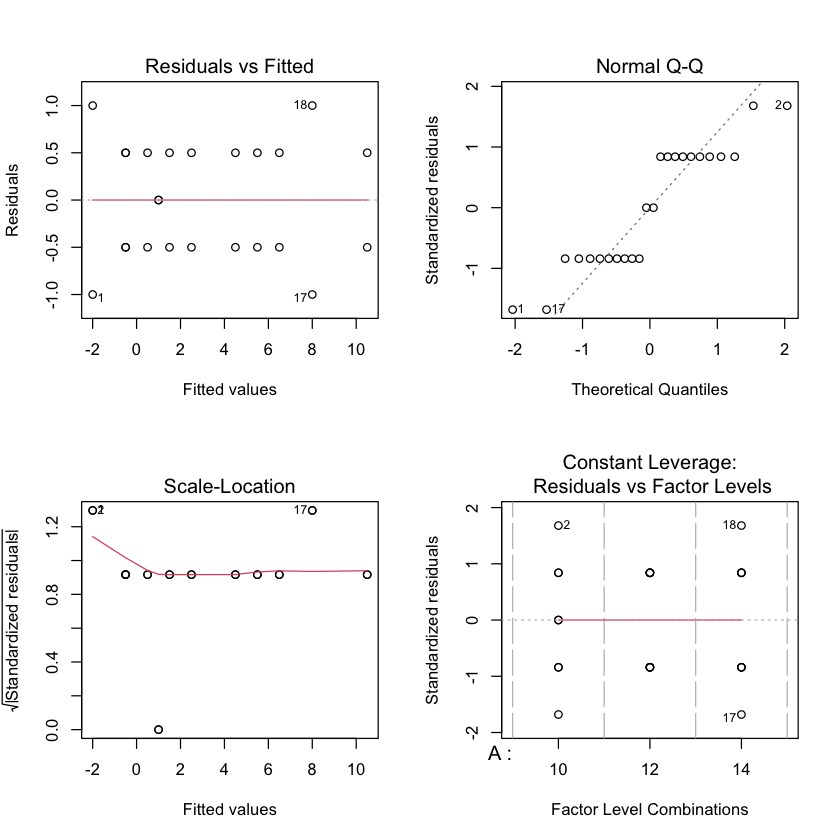

In [31]:
par(mfrow=c(2,2))
plot(anova)

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: B”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: C”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: A, B”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: A, C”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: B, C”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: A, B, C”


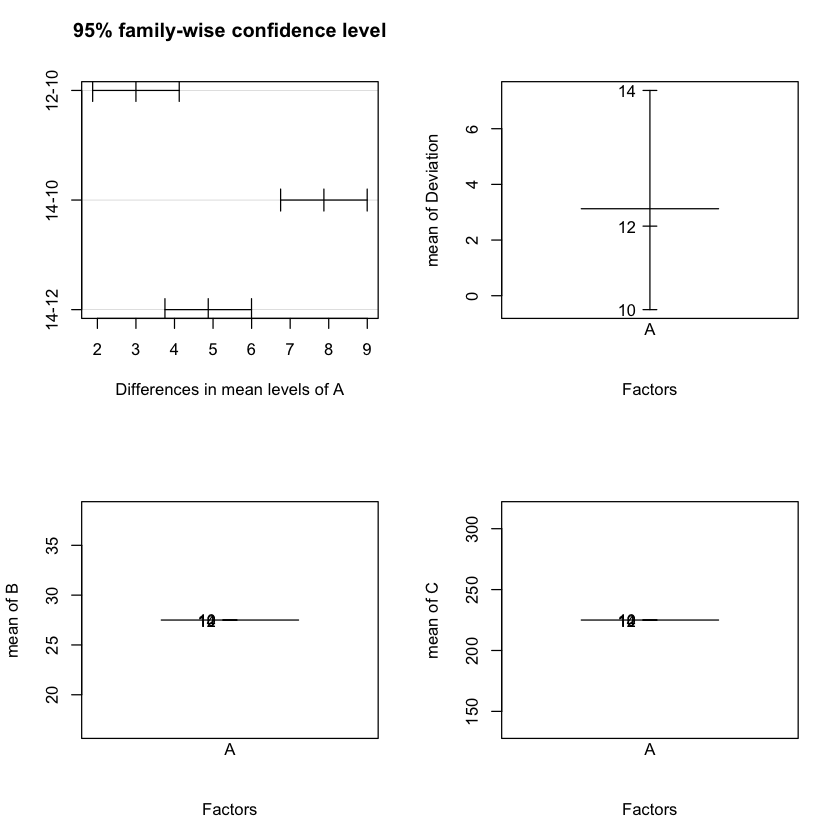

In [32]:
par(mfrow=c(2,2))
plot(TukeyHSD(anova, "A"))
plot.design(Deviation ~ A * B * C, data=dataset)

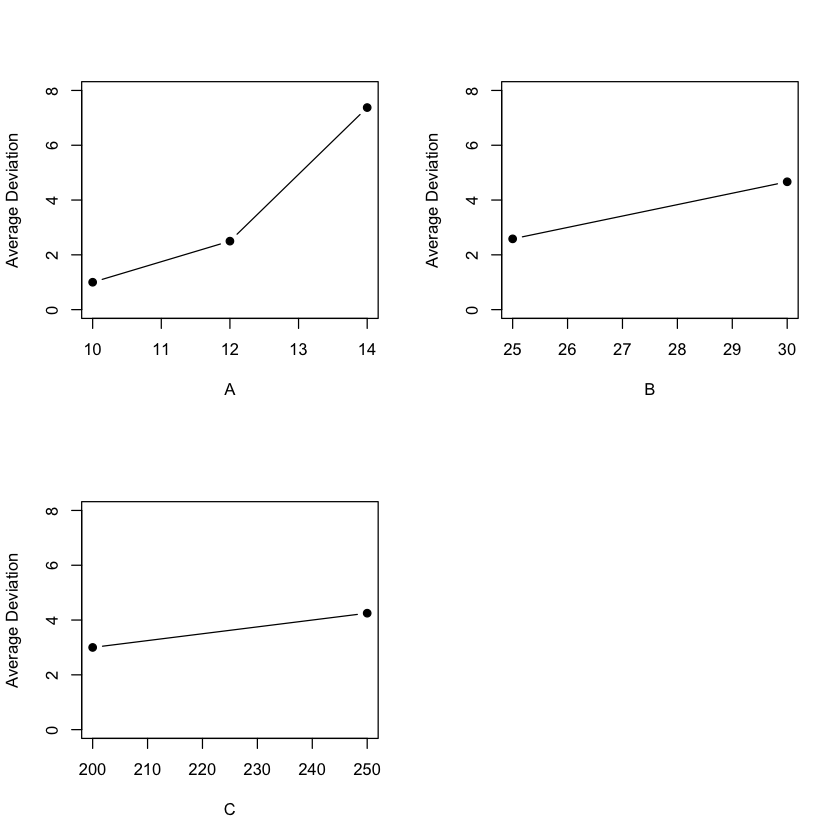

In [42]:
par(mfrow=c(2,2))
dataset_avg.A <- dataset %>% group_by(A) %>% summarise(Average=mean(abs(Deviation)))
plot(as.vector(dataset_avg.A$A), as.vector(dataset_avg.A$Average), type="b", xlab="A", ylab="Average Deviation", ylim=c(0, 8), pch=19)

dataset_avg.B <- dataset %>% group_by(B) %>% summarise(Average=mean(abs(Deviation)))
plot(as.vector(dataset_avg.B$B), as.vector(dataset_avg.B$Average), type="b", xlab="B", ylab="Average Deviation", ylim=c(0, 8), pch=19)

dataset_avg.C <- dataset %>% group_by(C) %>% summarise(Average=mean(abs(Deviation)))
plot(as.vector(dataset_avg.C$C), as.vector(dataset_avg.C$Average), type="b", xlab="C", ylab="Average Deviation", ylim=c(0, 8), pch=19)

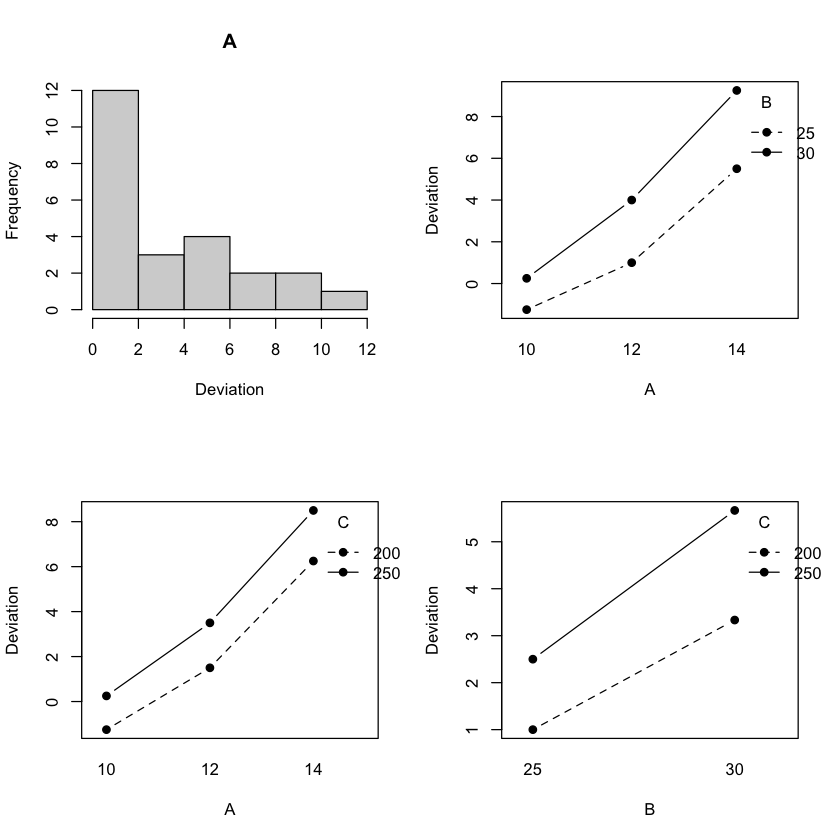

In [145]:
par(mfrow=c(2,2))
hist(abs(dataset$Deviation), main="A", xlab="Deviation")
with(dataset, interaction.plot(A,B,Deviation,type="b",pch=19, fixed=T, xlab="A",ylab="Deviation"))
with(dataset, interaction.plot(A,C,Deviation,type="b",pch=19, fixed=T, xlab="A",ylab="Deviation"))
with(dataset, interaction.plot(B,C,Deviation,type="b",pch=19, fixed=T, xlab="B",ylab="Deviation"))

In [63]:
dataset %>% arrange(B, C) %>% group_by(B, C) %>% summarise(Average=mean(abs(Deviation)), SD=sd(abs(Deviation)))

`summarise()` has grouped output by 'B'. You can override using the `.groups` argument.



B,C,Average,SD
<int>,<int>,<dbl>,<dbl>
25,200,2.333333,1.966384
25,250,2.833333,2.926887
30,200,3.666667,3.559026
30,250,5.666667,4.273952


Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. 
Conclusion: 

We reject the null hypothesis as all of three p-values are less than `0.05` (alpha level).

The is evidence that the percentage of carbonation, operating pressure, and line speed significantly affects the fill volume.

Given that all the `4` interactions p-values are less than `0.05` (alpha level), there is insufficient evidence of any interaction effect. It is also indicated by the parallelism of the lines.

To obtain the lowest average deviation from fill target (to be close to `0`), the choice to pick is the lowest `25`psi operating pressure, and high level of line speed `250`bpm to maximize the production rate concurrently.

<img src="AvgFillHeighDeviation.png" width="300" height="auto" />

The process is impacted by the values of carbonation level (**A**), causing the fill heights to flunctuate considerably, and this variability can be reduced if the distribution of **A** values follows the dotted Gaussian distribution instead. 

Reducing the standard deviation of **A** can be achieved by improving the temperature control during manufacturing, since specific carbonation levels are created based on the varying temperature level. By choosing the range of temperature for the specific **A** carbonation range, it allows less variation and flunctuations. This can be seen where more of its normal distribution skewed to its mean (center) compared to having it more spread (showing higher variability).

# Formative Questions

(Source: Chew Chee Hua. "Basic Statistical Methods in Experimental Design")

## Question 1

The yield of a chemical process is being studied. The two most important variables are thought to be the pressure and the temperature. `3` levels of each variable are selected, and a factorial experiment with `2` replicates is performed.

Analyse the data as ANOVA and draw conclusions.

## Question 2

Prepare appropriate residual plots and comment on the model’s adequacy.

## Question 3
Construct a Response Curve. What is the final model?

Temperature,Pressure.210,Pressure.215,Pressure.230
<fct>,<chr>,<chr>,<chr>
150,"90.4 , 90.2","90.7 , 90.6","90.2 , 90.4"
160,"90.1 , 90.3","90.5 , 90.6","89.9 , 90.1"
170,"90.5 , 90.7","90.8 , 90.9","90.4 , 90.1"


              Df Sum Sq Mean Sq F value   Pr(>F)    
Temp           2 0.3011  0.1506   8.469 0.008539 ** 
Pressure       2 0.7678  0.3839  21.594 0.000367 ***
Temp:Pressure  4 0.0689  0.0172   0.969 0.470006    
Residuals      9 0.1600  0.0178                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

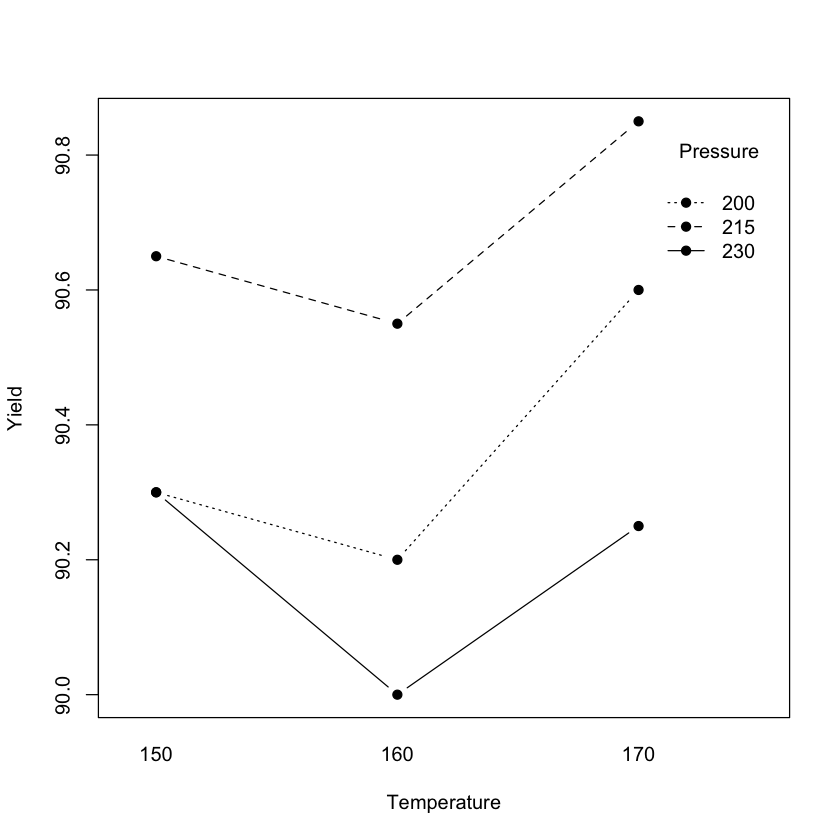

In [309]:
dataset <- read.csv('chemicalprocess.csv')
dataset$Temp = factor(dataset$Temp)
dataset$Pressure = factor(dataset$Pressure)

data.frame(Temperature=unique(dataset$Temp),
           Pressure.210=(dataset %>% filter(Pressure == 200) %>% group_by(Temp) %>% summarise(Yields=paste0(Yield, collapse=" , ")))$Yields,
           Pressure.215=(dataset %>% filter(Pressure == 215) %>% group_by(Temp) %>% summarise(Yields=paste0(Yield, collapse=" , ")))$Yields,
           Pressure.230=(dataset %>% filter(Pressure == 230) %>% group_by(Temp) %>% summarise(Yields=paste0(Yield, collapse=" , ")))$Yields)

anova <- aov(Yield ~ Temp * Pressure, data=dataset)
summary(anova)

with(dataset, interaction.plot(Temp, Pressure, Yield, type="b", pch=19, fixed=T, xlab="Temperature",ylab="Yield"))

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. 
Conclusion: 

We reject the null hypothesis as all of 2 p-values are less than `0.05` (alpha level).

The is evidence of pressure and temperature significantly affects the chemical process yield.

There is no evidence of significant interaction given the p-value more than `0.05` (alpha level). It is also indicated by the seeming parallelism of the lines. 

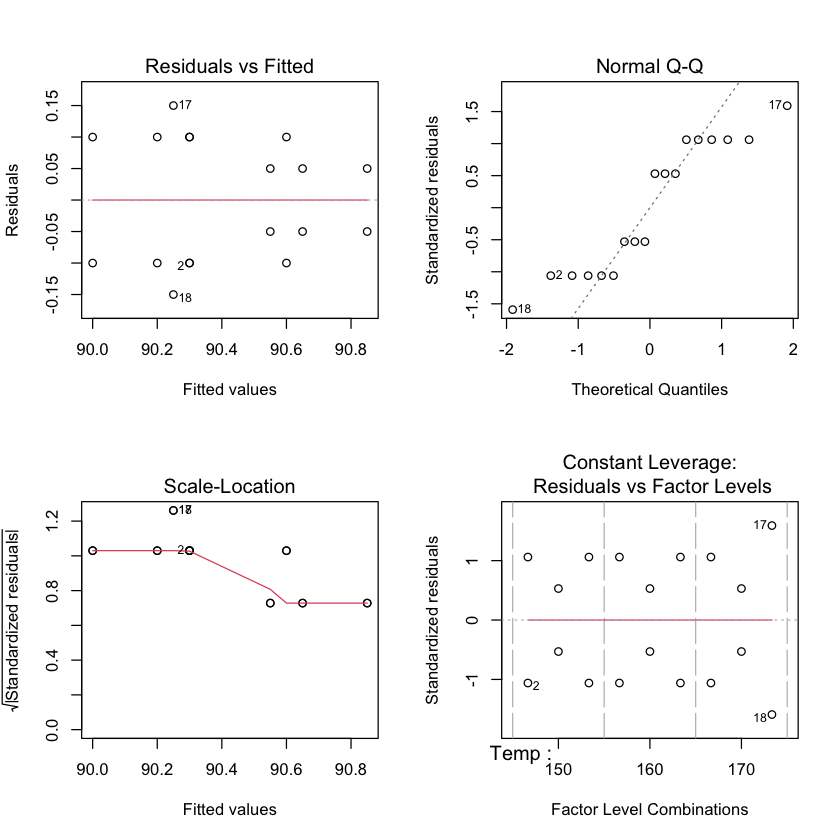

In [310]:
par(mfrow=c(2,2))
plot(anova)

The model is adequate and there is insufficient evidence to question linear model assumption and error normality, independence and constant variance assumptions.

Question: Why is that so? There seems to be quite some outliers in there.

In [325]:
dataset <- read.csv('chemicalprocess.csv')
anova <- aov(Yield ~ Pressure + Temp + Pressure * Temp + Temp * I(Pressure^2) + Pressure * I(Temp^2), data=dataset) 
summary(anova)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
Pressure            1 0.1008  0.1008   6.168   0.0323 *  
Temp                1 0.0675  0.0675   4.129   0.0696 .  
I(Pressure^2)       1 0.6669  0.6669  40.799 7.96e-05 ***
I(Temp^2)           1 0.2336  0.2336  14.291   0.0036 ** 
Pressure:Temp       1 0.0613  0.0613   3.747   0.0817 .  
Temp:I(Pressure^2)  1 0.0037  0.0037   0.229   0.6423    
Pressure:I(Temp^2)  1 0.0004  0.0004   0.025   0.8763    
Residuals          10 0.1635  0.0163                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Since the $AB$ term is found to be insignificant, we shall remove from the model,

In [326]:
anova <- lm(Yield ~ Pressure + Temp + I(Pressure^2) + I(Temp^2), data=dataset) 
summary(anova)


Call:
lm(formula = Yield ~ Pressure + Temp + I(Pressure^2) + I(Temp^2), 
    data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23889 -0.07639  0.01111  0.07361  0.21111 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   68.6129630 21.7308299   3.157  0.00756 ** 
Pressure       0.7742593  0.1268191   6.105 3.75e-05 ***
Temp          -0.7658333  0.2123398  -3.607  0.00319 ** 
I(Pressure^2) -0.0018148  0.0002949  -6.155 3.46e-05 ***
I(Temp^2)      0.0024167  0.0006635   3.643  0.00298 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1327 on 13 degrees of freedom
Multiple R-squared:  0.8236,	Adjusted R-squared:  0.7694 
F-statistic: 15.18 on 4 and 13 DF,  p-value: 8.031e-05


The final model becomes,

$y_{ij} = (68.6129630) + (0.7742593)B + (-0.7658333)A + (-0.0018148)*B^2 + (0.0024167)A^2$

In [337]:
yij <- 68.6129630 + 0.7742593 * dataset$Pressure - 0.7658333 * dataset$Temp - 0.0018148 * dataset$Pressure^2 + 0.0024167 * dataset$Temp^2
yij

[1] 90.37358 90.37358 90.20701 90.20701 90.52379 90.52379 90.69034 90.69034
 [9] 90.52377 90.52377 90.84055 90.84055 90.19044 90.19044 90.02387 90.02387
[17] 90.34065 90.34065

In [338]:
dataset$Yield

[1] 90.4 90.2 90.1 90.3 90.5 90.7 90.7 90.6 90.5 90.6 90.8 90.9 90.2 90.4 89.9
[16] 90.1 90.4 90.1

In [339]:
sum(yij)

[1] 1627.428

In [340]:
sum(dataset$Yield)

[1] 1627.4

## Question 4

An article in Industrial Quality Control describes an experiment to investigate the effect of the type of glass and the type of phosphor on the brightness of a television tube. The response variable is the current necessary (in microamps) to obtain a specified brightness level.

Is there any indication that either variable influences brightness?

## Question 5

Do the two variables interact?

## Question 6

Analyse the residuals from the experiment.

_**Note** that the study guide uses `370` but in the sample answer it is `310`_

Glass,Phosphor.1,Phosphor.2,Phosphor.3
<fct>,<chr>,<chr>,<chr>
T1,"280 , 290 , 285","300 , 310 , 295","290 , 285 , 290"
T2,"230 , 235 , 240","260 , 240 , 235","220 , 225 , 230"


               Df Sum Sq Mean Sq F value   Pr(>F)    
Glass           1  14450   14450 273.789 1.26e-09 ***
Phosphor        2    933     467   8.842  0.00436 ** 
Glass:Phosphor  2    133      67   1.263  0.31780    
Residuals      12    633      53                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

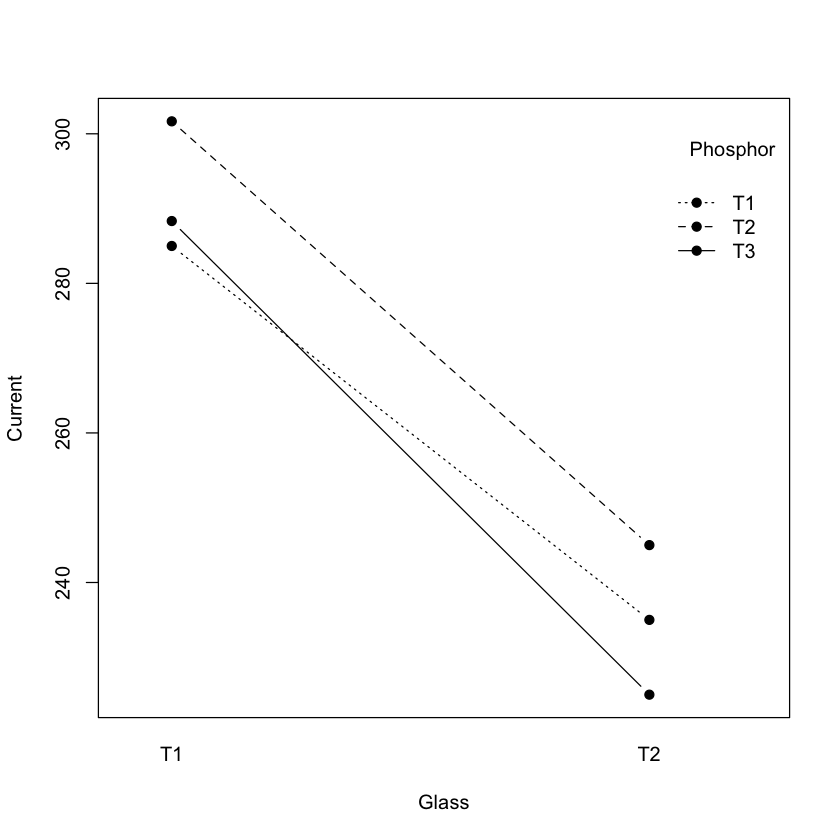

In [354]:
dataset <- read.csv('glass.csv')
dataset$Glass = factor(dataset$Glass)
dataset$Phosphor = factor(dataset$Phosphor)

data.frame(Glass=unique(dataset$Glass),
           Phosphor.1=(dataset %>% filter(Phosphor == "T1") %>% group_by(Glass) %>% summarise(Currents=paste0(Current, collapse=" , ")))$Currents,
           Phosphor.2=(dataset %>% filter(Phosphor == "T2") %>% group_by(Glass) %>% summarise(Currents=paste0(Current, collapse=" , ")))$Currents,
           Phosphor.3=(dataset %>% filter(Phosphor == "T3") %>% group_by(Glass) %>% summarise(Currents=paste0(Current, collapse=" , ")))$Currents)

anova <- aov(Current ~ Glass * Phosphor, data=dataset)
summary(anova)

with(dataset, interaction.plot(Glass, Phosphor, Current, type="b", pch=19, fixed=T, xlab="Glass",ylab="Current"))


Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. 
Conclusion: 

There is evidence of both the glass type and the phosphor type significantly affecting the current as its p-values are less than `0.05` (alpha level).

There is no evidence of significant interaction given the p-value more than `0.05` (alpha level). It is also indicated by the seeming parallelism of the lines. 

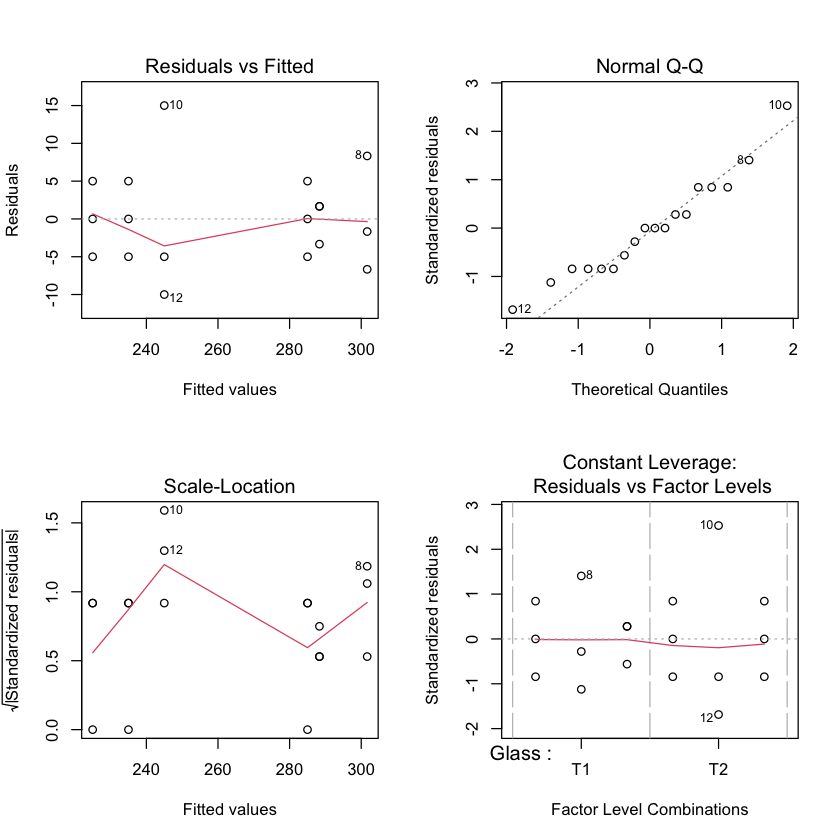

In [355]:
par(mfrow=c(2,2))
plot(anova)

The model is adequate and there is insufficient evidence to question linear model assumption and error normality, independence and constant variance assumptions.